In [34]:
import numpy as np
from scipy.spatial.distance import squareform, pdist
from scipy.stats            import entropy

import pandas as pd
import os, glob
import re

from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne   import _joint_probabilities

import seaborn as sns
import matplotlib.pyplot as plt

dat_dir = "/data/clintko/SMPK"
fhead   = "mpsk_tsne_jsdiv"
#fhead   = "ep8cs_tsne_jsdiv"
pal = sns.light_palette("blue", as_cmap=True)

In [35]:
%matplotlib inline

In [36]:
def fun(mat_raw_vs_cal):
    """..."""
    diag = np.diag(mat_raw_vs_cal)
    mat_out = np.zeros((18, 18))
    for i in range(18):
        for j in range(18):
            mat_out[i, j] = diag[i] + diag[j]
    return mat_out

In [51]:
!ls /data/clintko/SMPK/

C.txt				  ep8cs_prior50_tsne_raw.txt
ep8cs_dat_cal_prior05.txt	  ep8cs_priors_dat_mpsk_raw.RDS
ep8cs_dat_cal_prior06.txt	  ep8cs_tsne_cal_prior05.txt
ep8cs_dat_cal_prior07.txt	  ep8cs_tsne_cal_prior06.txt
ep8cs_dat_cal_prior08.txt	  ep8cs_tsne_cal_prior07.txt
ep8cs_dat_cal_prior09.txt	  ep8cs_tsne_cal_prior08.txt
ep8cs_dat_cal_prior10.txt	  ep8cs_tsne_cal_prior09.txt
ep8cs_dat_cal_prior11.txt	  ep8cs_tsne_cal_prior10.txt
ep8cs_dat_cal_prior12.txt	  ep8cs_tsne_cal_prior11.txt
ep8cs_dat_cal_prior13.txt	  ep8cs_tsne_cal_prior12.txt
ep8cs_dat_cal_prior14.txt	  ep8cs_tsne_cal_prior13.txt
ep8cs_dat_cal_prior15.txt	  ep8cs_tsne_cal_prior14.txt
ep8cs_dat_cal_prior20.txt	  ep8cs_tsne_cal_prior15.txt
ep8cs_dat_cal_prior25.txt	  ep8cs_tsne_cal_prior20.txt
ep8cs_dat_cal_prior30.txt	  ep8cs_tsne_cal_prior25.txt
ep8cs_dat_cal_prior35.txt	  ep8cs_tsne_cal_prior30.txt
ep8cs_dat_cal_prior40.txt	  ep8cs_tsne_cal_prior35.txt
ep8cs_dat_cal_prior45.txt	  ep8cs_tsne_cal_prior40.txt
ep8cs_dat_cal_prior50.tx

In [37]:
!ls /data/clintko/SMPK/ep8cs_tsne_jsdiv*

/data/clintko/SMPK/ep8cs_tsne_jsdiv_cal_prior05.npy
/data/clintko/SMPK/ep8cs_tsne_jsdiv_raw.npy


In [38]:
mat_jsdiv_raw = np.load(os.path.join(
    dat_dir, 
    fhead + "_raw.npy"))

In [39]:
mat_jsdiv_cal = np.load(os.path.join(
    dat_dir, 
    fhead + "_cal_prior05.npy"))

In [40]:
mat_jsdiv_raw_cal = np.load(os.path.join(
    dat_dir, 
    fhead + "_raw_cal_prior05.npy"))

In [48]:
mat = mat_jsdiv_raw
print(mat[:2, :2])

[[ 0.         22.92807331]
 [22.92807331  0.        ]]


In [49]:
mat = mat_jsdiv_cal
print(mat[:2, :2])

[[ 0.         23.00765557]
 [23.00765557  0.        ]]


In [50]:
mat = mat_jsdiv_raw_cal
print(mat[:2, :2])

[[ 8.30796219 22.96782233]
 [22.97470415  9.5723168 ]]


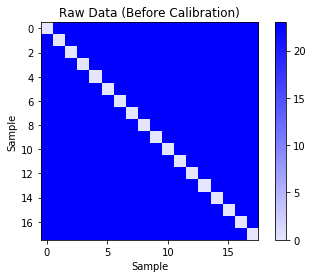

In [41]:
mat = mat_jsdiv_raw

plt.imshow(mat, interpolation='none', cmap=pal)
plt.title("Raw Data (Before Calibration)")
plt.xlabel("Sample")
plt.ylabel("Sample")
plt.colorbar()

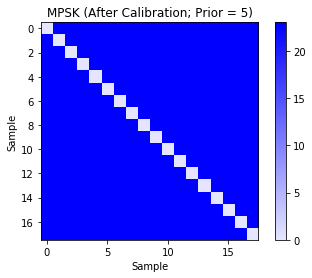

In [42]:
mat = mat_jsdiv_cal

plt.imshow(mat, interpolation='none', cmap=pal)
plt.title("MPSK (After Calibration; Prior = 5)")
plt.xlabel("Sample")
plt.ylabel("Sample")
plt.colorbar()

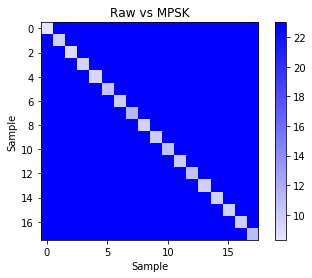

In [43]:
mat = mat_jsdiv_raw_cal

plt.imshow(mat, interpolation='none', cmap=pal)
plt.title("Raw vs MPSK")
plt.xlabel("Sample")
plt.ylabel("Sample")
plt.colorbar()

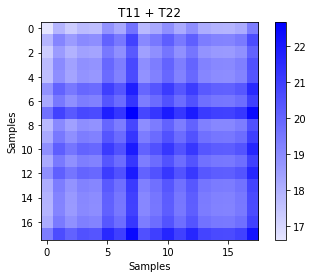

In [44]:
mat_trans = fun(mat_jsdiv_raw_cal)
mat = mat_trans

plt.imshow(mat, interpolation='none', cmap=pal)
plt.title("T11 + T22")
plt.xlabel("Samples")
plt.ylabel("Samples")
plt.colorbar()

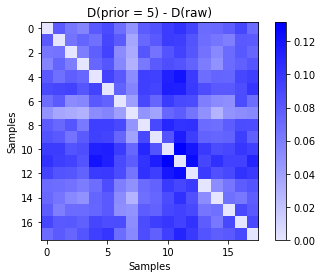

In [45]:
mat = mat_jsdiv_cal - mat_jsdiv_raw

plt.imshow(mat, interpolation='none', cmap=pal)
plt.title("D(prior = 5) - D(raw)")
plt.xlabel("Samples")
plt.ylabel("Samples")
plt.colorbar()

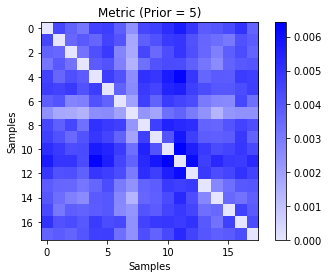

In [47]:
mat = (mat_jsdiv_cal - mat_jsdiv_raw) / mat_trans

plt.imshow(mat, interpolation='none', cmap=pal)
plt.title("Metric (Prior = 5)")
plt.xlabel("Samples")
plt.ylabel("Samples")
plt.colorbar()